## 1. Import Libraries

In [55]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [57]:
# We see there are mnay special charctersin place of missing values.
missing_values = ['?','--','-','??','.','unknown']
auto_df = pd.read_csv('Automobile_data.csv', na_values=missing_values)
auto_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [58]:
# Check for nan values.
auto_df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [59]:
# Drop certain features, which are not necessary.
auto_df.drop(['normalized-losses'], axis=1,inplace=True)
auto_df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [60]:
# As we can oserve there are onl few missing vlaues, so we can drop those particular values.
auto_df.dropna(inplace=True)

## 2. Performing EDA

In [61]:
# unique brand names.
auto_df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

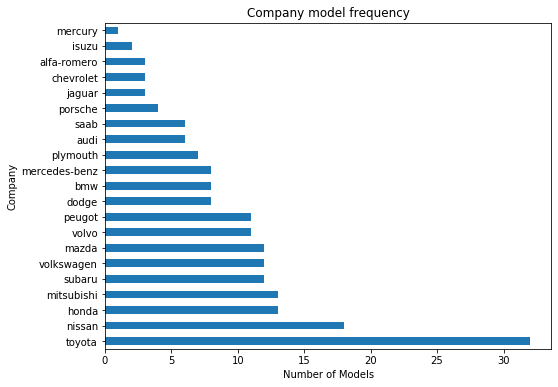

In [62]:
plt.figure(figsize=(8,6))
auto_df['make'].value_counts().plot(kind='barh')
plt.xlabel('Number of Models')
plt.ylabel('Company')
plt.title('Company model frequency');

### Top 3 vehicles are 'toyota','nissan' and 'honda'.

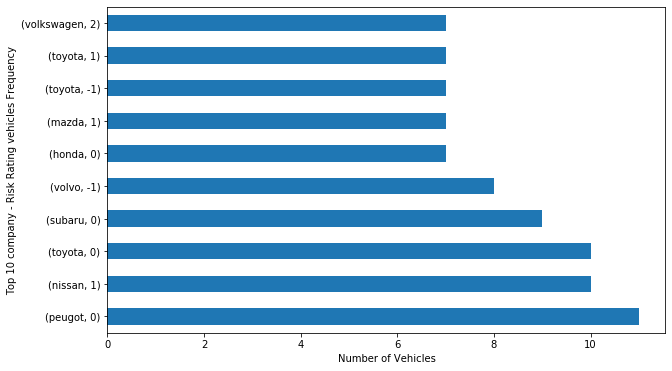

In [63]:
plt.figure(figsize=(10,6))
auto_df.groupby(['make','symboling'])['make'].count().nlargest(10).plot(kind='barh')
plt.xlabel('Number of Vehicles')
plt.ylabel('Top 10 company - Risk Rating vehicles Frequency');

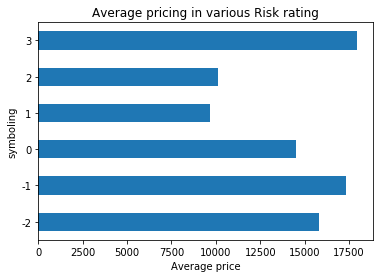

In [64]:
auto_df.groupby(['symboling'])['price'].mean().plot(kind='barh')
plt.xlabel('Average price')
plt.title('Average pricing in various Risk rating');

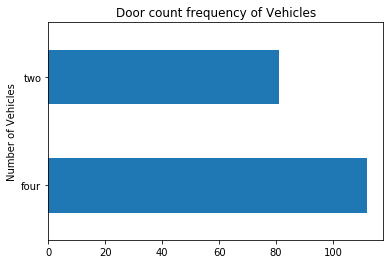

In [65]:
auto_df['num-of-doors'].value_counts().plot(kind='barh')
plt.ylabel('Door Count')
plt.ylabel('Number of Vehicles')
plt.title('Door count frequency of Vehicles');

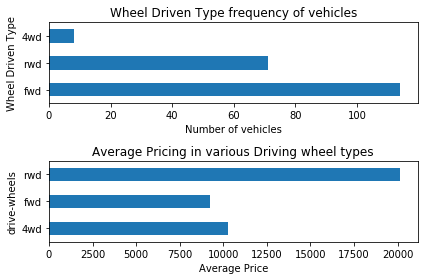

In [66]:
plt.subplot(2, 1, 1)
auto_df['drive-wheels'].value_counts().plot(kind='barh')
plt.ylabel('Wheel Driven Type')
plt.xlabel('Number of vehicles')
plt.title("Wheel Driven Type frequency of vehicles")

plt.subplot(2, 1, 2)
auto_df.groupby(['drive-wheels'])['price'].mean().plot(kind='barh')
plt.xlabel('Average Price')
plt.title('Average Pricing in various Driving wheel types')

plt.tight_layout();

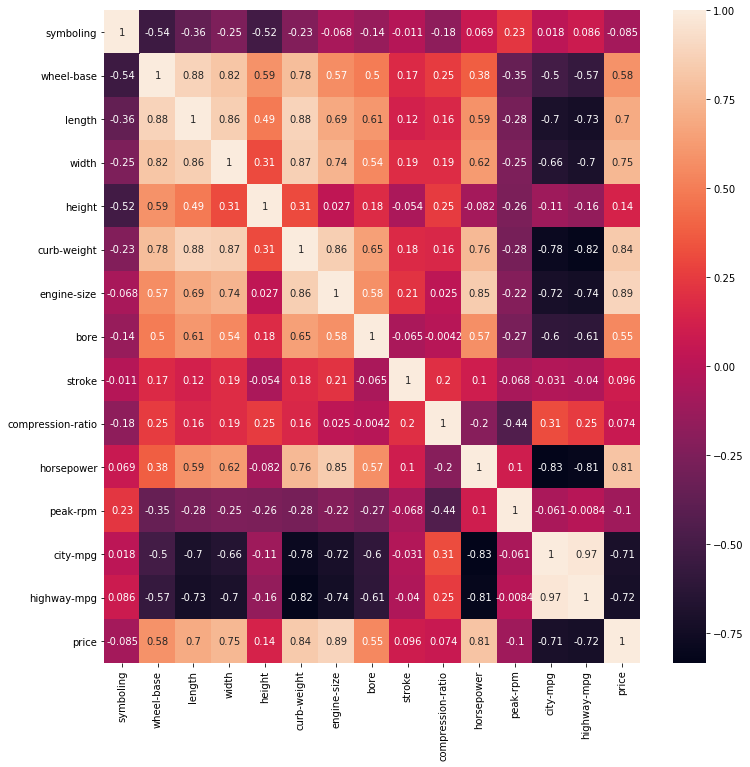

In [67]:
# Corelation matrix
plt.figure(figsize=(12,12))
sns.heatmap(auto_df.corr(), annot=True);

As we can observe, Predictor Variable - 'price' has high coorelation with 'engine-size'.

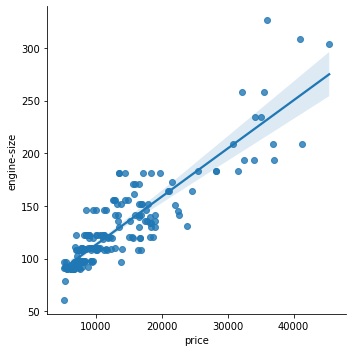

In [68]:
sns.lmplot('price', 'engine-size', auto_df);

In [69]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   make               193 non-null    object 
 2   fuel-type          193 non-null    object 
 3   aspiration         193 non-null    object 
 4   num-of-doors       193 non-null    object 
 5   body-style         193 non-null    object 
 6   drive-wheels       193 non-null    object 
 7   engine-location    193 non-null    object 
 8   wheel-base         193 non-null    float64
 9   length             193 non-null    float64
 10  width              193 non-null    float64
 11  height             193 non-null    float64
 12  curb-weight        193 non-null    int64  
 13  engine-type        193 non-null    object 
 14  num-of-cylinders   193 non-null    object 
 15  engine-size        193 non-null    int64  
 16  fuel-system        193 non

## 3. ML Model
As we can observe there are few object type features, which have to encoded before giving as input to, model.

In [70]:
X = auto_df.iloc[:,0:-1].values
y = auto_df.iloc[:,-1].values

# X = auto_df.iloc[:,0:-1]
# y = auto_df.iloc[:,-1]

print('Number of features before encoding = ',X.shape[1])

# Encoding the Categorical Columns using LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(X.shape[1]):
    X[:,i] = le.fit_transform(X[:,i])

print('Number of features after encoding = ',X.shape[1])

Number of features before encoding =  24
Number of features after encoding =  24


### Best Features Selection.

Recursive Feature Elimination is used to eliminate those features which are not having significant effect in prediction.

In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

rfe = RFE(estimator = LinearRegression())
rfe.fit(X,y)
X = rfe.transform(X)
X.shape

(193, 12)

### Dimentionality Reduction

PCA can be thought of as a projection method where data with n_column(features) is projected into subspace with n or fewer features.

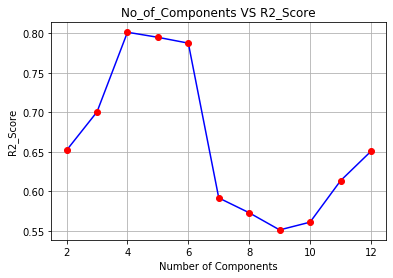

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

i_value=[]
r2_value=[]
for i in range(2,np.size(X,1)+1):
    
    # Breaking X and y in Training and Test Set
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
    
    # Applying PCA
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    # Training And Testing the model
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    r2_value.append(r2_score(y_pred,y_test).round(4))
    i_value.append(i)
    
# Plotting the r2 Score with different number of components for PCA
plt.plot(i_value,r2_value,marker='o',mfc='red',mec='red',color='blue')
plt.xlabel('Number of Components')
plt.ylabel('R2_Score')
plt.title('No_of_Components VS R2_Score')
plt.grid(b=None)
plt.show()

As we can obsere the r2_score is saturated at **4** .

### Multi Linear Regression

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Breaking X and y in training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Applying PCA with best components for PCA
n = r2_value.index(max(r2_value))+2
pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(n)

4


### Train, test and Metrics.

In [78]:
# Training model
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Prediction of 'price'.
y_pred = rfr.predict(X_test)

### R2 score

In [79]:
from sklearn.metrics import r2_score
print('R2 score for test set {}'.format(r2_score(y_test, y_pred).round(3)))

R2 score for test set 0.857


Other Metrics to consider for Regression type model.

In [84]:
from sklearn.metrics import mean_squared_error
from math import sqrt

MSE = mean_squared_error(y_test, y_pred)
RMSE = sqrt(MSE)

print(f'MSE : {MSE}')
print(f'RMSE : {RMSE}')

MSE : 8253706.792080682
RMSE : 2872.926520480585


## Conclusion
By performing EDA, we came to know that 'engine-size','curb-weight' and 'horse-price have higher corelation of 0.8 and 'city-mpg', 'highway-mpg' have neagtive correlation indiacted that lower price vehicles are fuel efficient.

Applying RFE reduced the siginificant features to be consiered to 12. After applying Dimentionality Redcution Technique, i nopur case we used PCA total 4 features were selected for final training. At last, Conclusion is by using Random forest regressor, R2 score is '0.857'.
